In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # Ensure joblib is imported

# Load the dataset
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)
data.dropna(subset=['Crime Rate'], inplace=True)

# Define the feature matrix (X) and target vector (y)
X = data[['housing_cost', 'taxes', 'other_necessities_cost', 'median_family_income', 'Crime Rate']]
y = data['total_cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(model, 'linear_regression_model.pkl')

# (Optional) Load the model back from the file
loaded_model = joblib.load('linear_regression_model.pkl')

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)

# Calculate and print model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R²: {r2}')


MSE: 7007533.612072086, R²: 0.9680342280282986


In [2]:
# Getting the coefficients from the model
coefficients = model.coef_

# Creating a DataFrame to display variable names and their corresponding coefficients
coefficients_df = pd.DataFrame(data={'Variable': X.columns, 'Coefficient': coefficients})
# Extracting the intercept from the model
intercept = model.intercept_




coefficients_df , intercept

(                 Variable  Coefficient
 0            housing_cost    -0.458461
 1                   taxes     2.416455
 2  other_necessities_cost     3.594878
 3    median_family_income     0.053377
 4              Crime Rate   -37.883888,
 34349.05314322249)

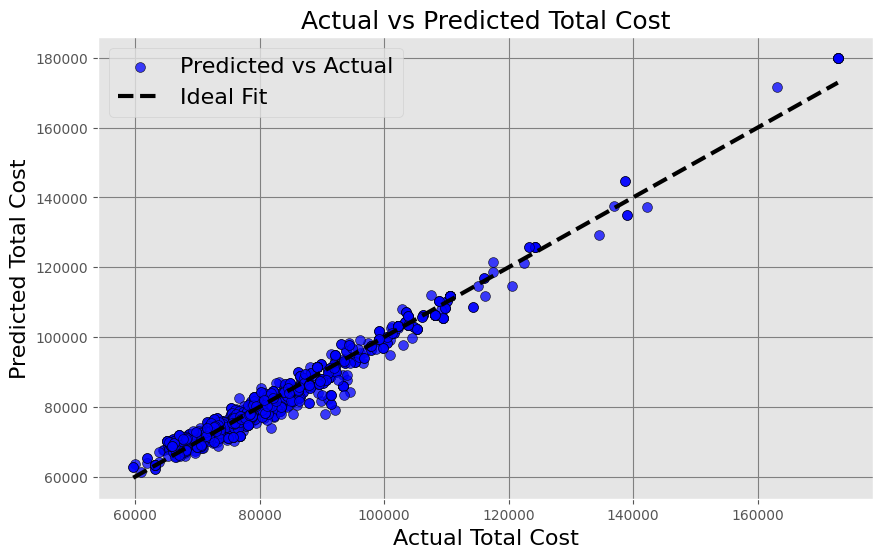

In [9]:
import matplotlib.pyplot as plt

# Using a predefined style (optional)
plt.style.use('ggplot')  # For a different aesthetic look

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))  # Adjusting the size and DPI for better quality
plt.scatter(y_test, y_pred, alpha=0.75, color='blue', s=50, edgecolor='k', label='Predicted vs Actual')  # Increased size and added edge
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label='Ideal Fit')  # Increased line width

# Labeling the plot
plt.xlabel('Actual Total Cost', fontsize=16, color='black')
plt.ylabel('Predicted Total Cost', fontsize=16, color='black')
plt.title('Actual vs Predicted Total Cost', fontsize=18, color='black')

# Configuring legend with black text
legend = plt.legend(fontsize=16)
for text in legend.get_texts():
    text.set_color('black')

# Adjust grid color to better match the ggplot style while ensuring it is visible
plt.grid(True, color='grey')  # Light grey grid lines can complement the ggplot style well

# Save the figure with a transparent background
plt.savefig('actual_vs_predicted.png', dpi=300, transparent=True) # Saving the plot as an image

# Display the plot
plt.show()


#Hexbin Plot

A hexbin plot is useful for representing the density of points. It is especially effective in revealing the concentration of data points in regions where scatter plots might overplot and obscure details

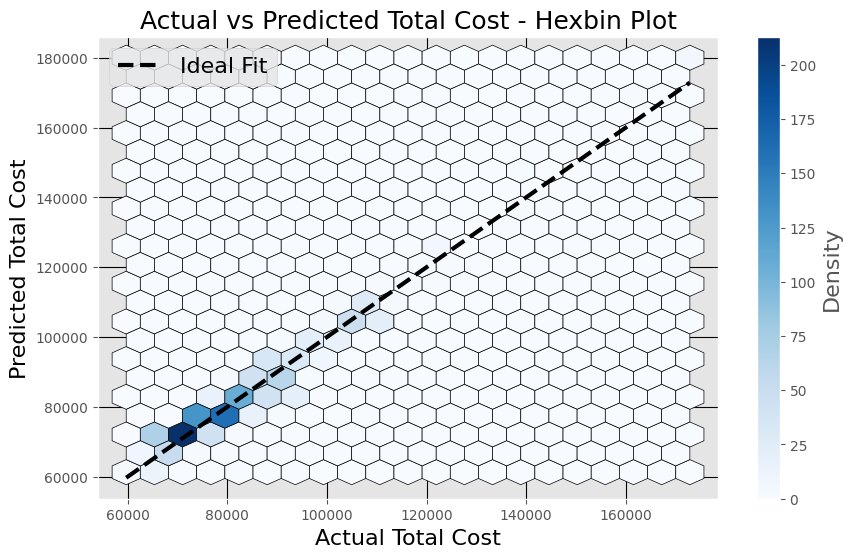

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Using a predefined style (optional)
plt.style.use('ggplot')  # For a different aesthetic look

# Plotting actual vs predicted values using hexbin
plt.figure(figsize=(10, 6))
hb = plt.hexbin(y_test, y_pred, gridsize=20, cmap='Blues', edgecolors='black', linewidths=0.5)
cb = plt.colorbar(hb, label='Density')
cb.set_label('Density', fontsize=16)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label='Ideal Fit')

# Labeling the plot
plt.xlabel('Actual Total Cost', color='black', fontsize=16)
plt.ylabel('Predicted Total Cost', color='black',fontsize=16)
plt.title('Actual vs Predicted Total Cost - Hexbin Plot', color='black',fontsize=18)

# Configuring legend with black text
legend = plt.legend(fontsize=16)
for text in legend.get_texts():
    text.set_color('black')

# Adjust grid color to better match the ggplot style while ensuring it is visible
plt.grid(True, color='black')

# Save the figure with a transparent background
plt.savefig('actual_vs_predicted_hexbin.png', dpi=300, transparent=True)

# Display the plot
plt.show()


#Density Contour Plot

Alternatively, a density contour plot (or a 2D density plot) offers another visually appealing method to analyze the distribution between actual and predicted values:

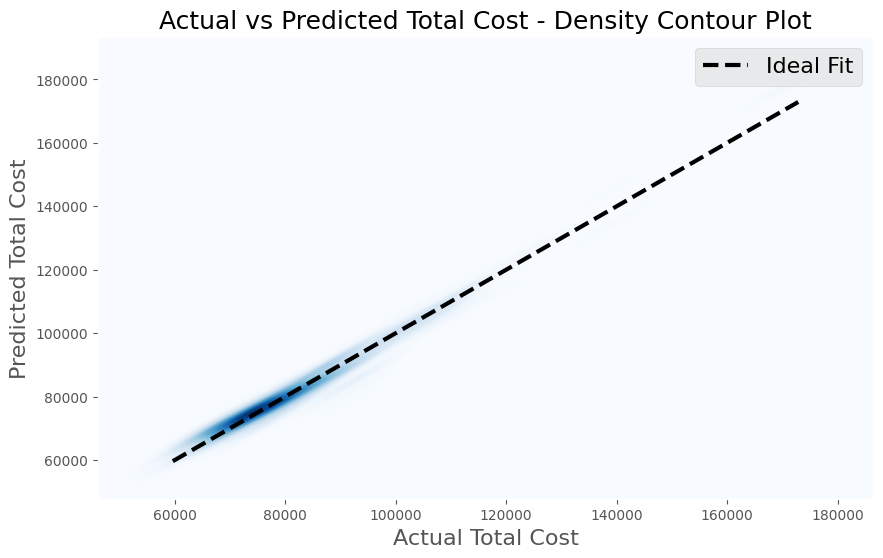

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using a predefined style
plt.style.use('ggplot')

# Plotting actual vs predicted values with density contours
plt.figure(figsize=(10, 6))
sns.kdeplot(x=y_test, y=y_pred, cmap='Blues', fill=True, thresh=0, levels=100)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label='Ideal Fit')

# Labeling the plot
plt.xlabel('Actual Total Cost', fontsize=16)
plt.ylabel('Predicted Total Cost', fontsize=16)
plt.title('Actual vs Predicted Total Cost - Density Contour Plot', fontsize=18)

# Configuring legend with black text
legend = plt.legend(fontsize=16)
for text in legend.get_texts():
    text.set_color('black')

# Save the figure with a transparent background
plt.savefig('actual_vs_predicted_density.png', dpi=300, transparent=True)

# Display the plot
plt.show()


#Residual Plot

This plot shows the residuals (differences between observed and predicted values) on the y-axis against the predicted values on the x-axis. It's particularly useful for diagnosing your regression model, as it can reveal patterns that suggest issues like non-linearity, heteroscedasticity, or outliers.

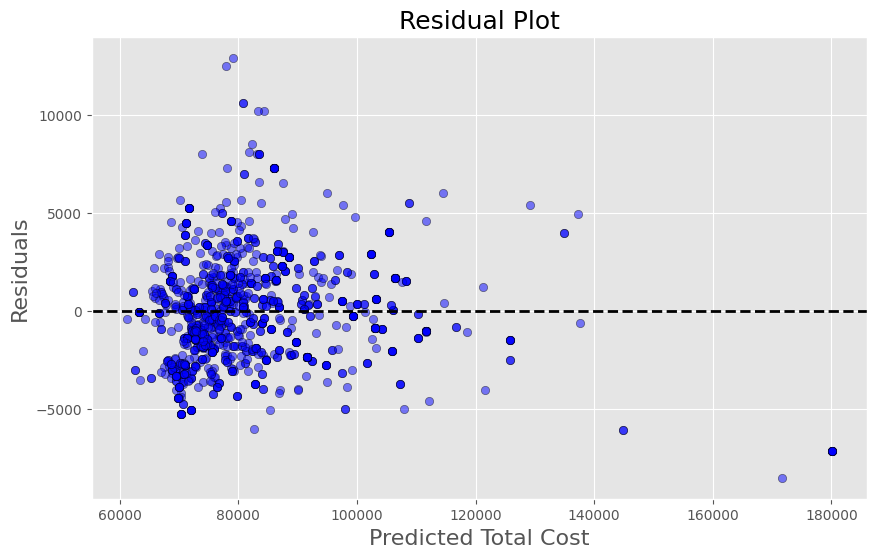

In [6]:
import matplotlib.pyplot as plt

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Zero line for reference

plt.xlabel('Predicted Total Cost', fontsize=16)
plt.ylabel('Residuals', fontsize=16)
plt.title('Residual Plot', fontsize=18)

plt.grid(True)
plt.savefig('residual_plot.png', dpi=300, transparent=True)
plt.show()


#Error Bar Plot

This plot can be used to visualize the variability of data and can include error bars to represent the error or uncertainty within each data point.

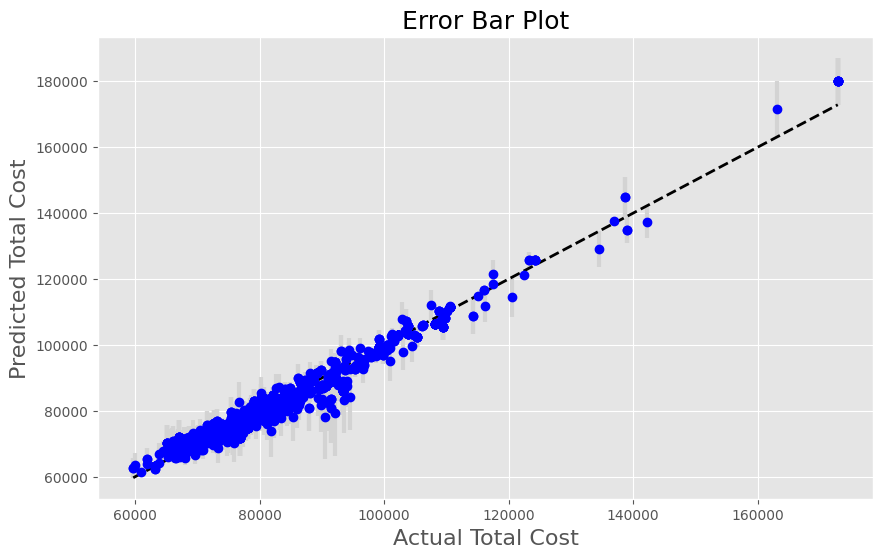

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Error bar plot showing predictions with error margins
error = np.abs(y_test - y_pred)
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_pred, yerr=error, fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)

plt.xlabel('Actual Total Cost', fontsize=16)
plt.ylabel('Predicted Total Cost', fontsize=16)
plt.title('Error Bar Plot', fontsize=18)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.grid(True)
plt.savefig('error_bar_plot.png', dpi=300, transparent=True)
plt.show()
